## EDA

- import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

- 데이터 불러오기

In [5]:
# 데이터 경로 설정
DATA_DIR = "/content/drive/MyDrive/contest/open_v2/data"

# CSV 파일 불러오기
train_meta = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test_meta = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
train_a = pd.read_csv(os.path.join(DATA_DIR, "train", "A.csv"))
train_b = pd.read_csv(os.path.join(DATA_DIR, "train", "B.csv"))
test_a = pd.read_csv(os.path.join(DATA_DIR, "test", "A.csv"))
test_b = pd.read_csv(os.path.join(DATA_DIR, "test", "B.csv"))

# 데이터 크기 확인
print("train_meta:", train_meta.shape)
print("test_meta:", test_meta.shape)
print("train_a:", train_a.shape)
print("train_b:", train_b.shape)
print("test_a:", test_a.shape)
print("test_b:", test_b.shape)


train_meta: (944767, 3)
test_meta: (10, 2)
train_a: (647241, 37)
train_b: (297526, 31)
test_a: (4, 37)
test_b: (6, 31)


In [6]:
train_meta.head()

,Test_id,Test,Label
0,0xE3EDFEA7DB8FF2606A19628967674BA957FB4BD58549...,A,0
1,0xDA572847455702C04D71C54677413CB8E31944B99289...,A,0
2,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,B,0
3,0x59D17D1C537B5FDE6622A9CB0A4192529CB4BD8D5422...,A,0
4,0x23005DA8BB4C84E1363A44A4248987798F3EAD4C58D3...,A,0


- 결측치 확인

In [7]:
# train_meta 기본 정보
print("=== train_meta info ===")
print(train_meta.info())
print("\n=== train_meta 결측치 확인 ===")
print(train_meta.isnull().sum())

# train_a와 train_b 기본 정보
print("\n=== train_a info ===")
print(train_a.info())
print("\n=== train_b info ===")
print(train_b.info())

# train_a 결측치 상위 10개
print("\n=== train_a 결측치 Top10 ===")
print(train_a.isnull().sum().sort_values(ascending=False).head(10))

=== train_meta info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944767 entries, 0 to 944766
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Test_id  944767 non-null  object
 1   Test     944767 non-null  object
 2   Label    944767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 21.6+ MB
None

=== train_meta 결측치 확인 ===
Test_id    0
Test       0
Label      0
dtype: int64

=== train_a info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647241 non-null  object
 1   Test        647241 non-null  object
 2   PrimaryKey  647241 non-null  object
 3   Age         647241 non-null  object
 4   TestDate    647241 non-null  int64 
 5   A1-1        647241 non-null  object
 6   A1-2        647241 non-null  object
 7   A1-3        647241 non-null  objec

- 코드 병합

In [9]:
# A/B 각각 메타데이터 병합
train_a_merged = train_a.merge(
    train_meta[train_meta['Test'] == 'A'][['Test_id', 'Label']],
    on='Test_id',
    how='left'
)

train_b_merged = train_b.merge(
    train_meta[train_meta['Test'] == 'B'][['Test_id', 'Label']],
    on='Test_id',
    how='left'
)

# Age 컬럼 숫자형 변환
train_a_merged['Age'] = pd.to_numeric(train_a_merged['Age'], errors='coerce')
train_b_merged['Age'] = pd.to_numeric(train_b_merged['Age'], errors='coerce')

# 변환 결과 확인
print("A set Age 요약:")
print(train_a_merged['Age'].describe())
print("\nB set Age 요약:")
print(train_b_merged['Age'].describe())

A set Age 요약:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

B set Age 요약:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64


- age 값 확인

In [10]:
# Age 컬럼의 unique 값 일부 확인
print("=== A set Age 고유값 ===")
print(train_a['Age'].unique()[:20])

print("\n=== B set Age 고유값 ===")
print(train_b['Age'].unique()[:20])

=== A set Age 고유값 ===
['20a' '20b' '30a' '30b' '40a' '40b' '50a' '50b' '60a' '60b' '70a' '70b']

=== B set Age 고유값 ===
['60b' '70a' '70b' '80a' '80b']


In [11]:
# Age에서 숫자만 추출해서 정수형으로 변환
train_a['Age_group'] = train_a['Age'].str.extract('(\d+)').astype(int)
train_b['Age_group'] = train_b['Age'].str.extract('(\d+)').astype(int)

# 확인
print(train_a[['Age', 'Age_group']].head())
print(train_b[['Age', 'Age_group']].head())


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3840959490.py:2: SyntaxWarning: invalid escape sequence '\d'
  train_a['Age_group'] = train_a['Age'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-3840959490.py:3: SyntaxWarning: invalid escape sequence '\d'
  train_b['Age_group'] = train_b['Age'].str.extract('(\d+)').astype(int)


   Age  Age_group
0  20a         20
1  20a         20
2  20a         20
3  20a         20
4  20a         20
   Age  Age_group
0  60b         60
1  60b         60
2  70a         70
3  60b         60
4  60b         60


### A 세트 상관관계 해석 요약

1. **A9 계열 피처들 간 강한 양의 상관관계**
   - `A9-1` ~ `A9-5` 사이의 상관계수가 약 0.6~0.7 수준으로 높음.  
   - 즉, 이 다섯 변수는 거의 비슷한 패턴으로 움직임.  
   - → 중복 정보 가능성 있음 (모델링 시 다 포함하면 다중공선성 발생 가능)

2. **A6-1, A7-1 간 중간 수준의 양의 상관관계**
   - 상관계수 약 0.61로 두 항목이 비슷한 특성을 반영할 가능성이 있음.

3. **A8, A9 그룹 간 약한 양의 상관 (~0.4~0.5)**
   - 예: `A8-2` ↔ `A9-1`: 0.53  
   - → 두 그룹이 어느 정도 유사한 검사 영역을 측정하는 것으로 추정됨.

4. **Age_group은 대부분의 피처와 거의 무관**
   - 상관계수가 대부분 ±0.2 이하.  
   - → 연령대에 따라 검사 점수가 크게 달라지지 않음.

5. **TestDate와 다른 변수들 간 관계도 거의 없음**
   - 상관계수가 거의 0에 가까움.  
   - → 시험 시점과 검사 결과 간의 관계는 미미함.


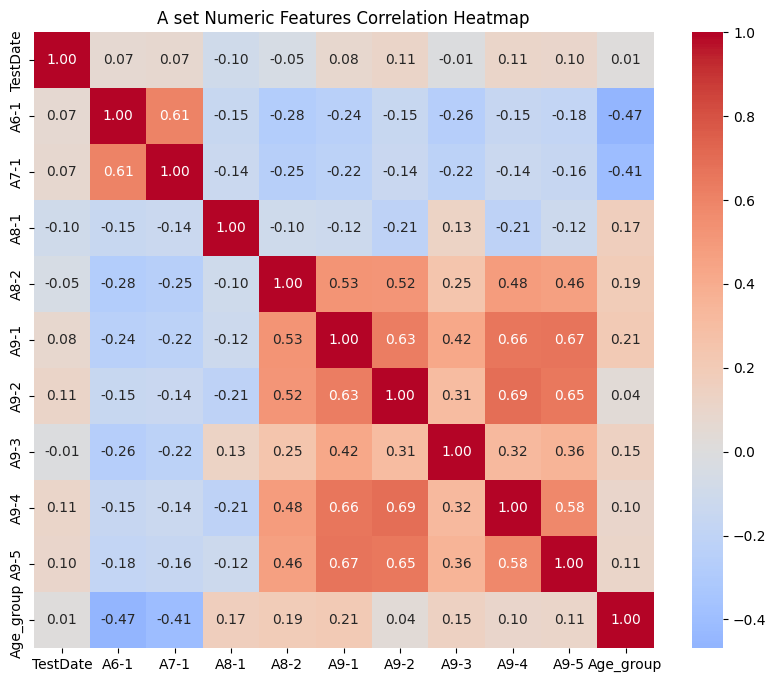

In [13]:
# A 세트에서 숫자형 컬럼만 추출
numeric_cols_a = train_a.select_dtypes(include=['int64', 'float64']).columns

# 상관행렬 계산
corr_a = train_a[numeric_cols_a].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_a, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("A set Numeric Features Correlation Heatmap")
plt.show()

### B 세트 상관관계 해석 요약

1. **B9-1 ↔ B9-2: 완전한 음의 상관(-1.00)**
   - 두 변수가 정반대로 움직임.  
   - → 둘 중 하나는 다른 하나의 **보완 지표(혹은 반대 개념)** 일 가능성 있음.  
   - 예: 정답률/오답률, 정반대 반응시간 등.

2. **B9-3 ↔ B9-4: 완전한 음의 상관(-0.99)**
   - 마찬가지로 거의 동일한 크기의 반대 방향 관계.  
   - → 한쪽이 높을수록 다른 쪽이 낮음.

3. **B9-1, B10-1 간 높은 양의 상관(0.86)**
   - B9-1이 커질수록 B10-1도 같이 증가하는 경향.  
   - → 두 문항이 유사한 영역(같은 능력이나 행동 특성)을 측정할 가능성.

4. **B9-2, B10-2 간 높은 양의 상관(0.86)**
   - A세트처럼 일부 문항 간 패턴의 일관성이 존재.

5. **B10-3 ↔ B10-4: 완전한 음의 상관(-1.00)**
   - 내부적으로 반대 개념의 항목일 가능성이 높음.

6. **Age_group과 대부분 변수 간 상관 거의 없음 (|r| < 0.1)**
   - → 연령대는 검사 결과에 거의 영향을 주지 않음.

7. **TestDate와 특정 항목 간 부분적 연관**
   - B9-1, B10-1 등과 약한 양의 상관(0.45~0.48)  
   - → 시험 시점이 일부 변수 값에 약간의 영향을 줄 수 있음 (예: 환경적 요인 등).

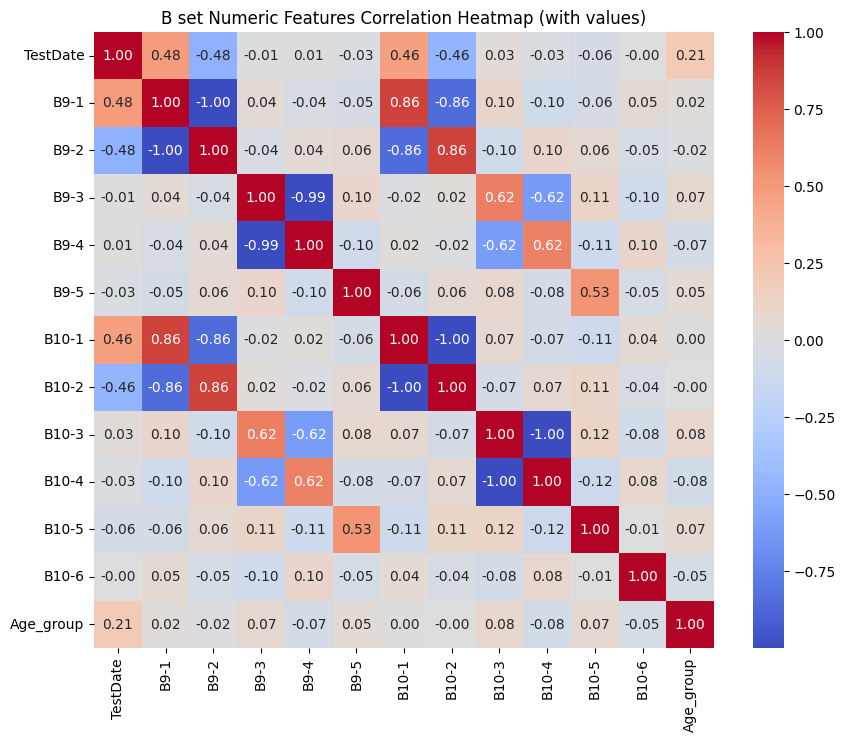

In [14]:
# B 세트에서 숫자형 컬럼만 추출
numeric_cols_b = train_b.select_dtypes(include=['int64', 'float64']).columns

# 상관행렬 계산
corr_b = train_b[numeric_cols_b].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_b, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("B set Numeric Features Correlation Heatmap (with values)")
plt.show()

### 라벨 분포 확인

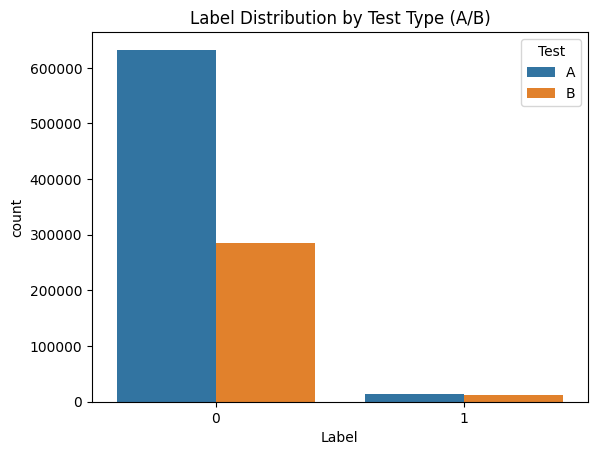

전체 Label 비율:
Label
0    0.971123
1    0.028877
Name: proportion, dtype: float64


In [18]:
# Label 분포 시각화 (A/B 세트 구분)
sns.countplot(data=train_meta, x='Label', hue='Test')
plt.title('Label Distribution by Test Type (A/B)')
plt.show()

# 전체 Label 비율 확인
print("전체 Label 비율:")
print(train_meta['Label'].value_counts(normalize=True))

### A세트(Label) 상관관계 요약

- 대부분의 피처가 Label과의 상관관계가 매우 약하며, 단일 변수만으로는 Label을 구분하기 어렵다.  
- **A8, A9 계열 피처들**이 Label과 일관된 **약한 양의 상관관계**를 보인다.  
  - 예: `A8-2`, `A9-1`, `A9-3` 등은 Label=1일수록 약간 높은 경향.  
- **A6-1, A7-1**은 Label과 **약한 음의 상관(-0.05 수준)** 으로, 값이 높을수록 Label=1 비율이 낮은 편이다.  
- **Age_group**은 Label과의 상관이 **0.076으로 가장 높음**,  
  → Label=1인 그룹이 평균적으로 조금 더 높은 연령대일 가능성이 있다.  
- **TestDate**는 Label과 약한 음의 상관(-0.036)을 보이며,  
  → 시험 시점이 최근일수록 Label=1 비율이 소폭 낮은 경향을 나타낸다.

**요약:**  
Label과 피처 간 뚜렷한 상관은 없지만,  
A8·A9 영역과 연령대(Age_group)가 비교적 의미 있는 신호를 가지고 있을 가능성이 있다.


In [20]:
# A세트에 Label 병합
train_a_merged = train_a.merge(
    train_meta[train_meta['Test'] == 'A'][['Test_id', 'Label']],
    on='Test_id',
    how='left'
)

# 숫자형 피처만 선택
numeric_cols_a = train_a_merged.select_dtypes(include=['int64', 'float64']).columns

# Label과의 상관계수 계산
corr_with_label = train_a_merged[numeric_cols_a].corr()['Label'].sort_values(ascending=False)

# 상위 10개 출력
print("Label과의 상관계수 Top 10 피처:")
print(corr_with_label.head(10))

# 하위 10개도 참고용으로 출력
print("\nLabel과의 상관계수 Bottom 10 피처:")
print(corr_with_label.tail(10))

Label과의 상관계수 Top 10 피처:
Label        1.000000
Age_group    0.076368
A8-2         0.027949
A9-1         0.021305
A9-3         0.019116
A8-1         0.016195
A9-5         0.016082
A9-2         0.008319
A9-4         0.005525
TestDate    -0.036513
Name: Label, dtype: float64

Label과의 상관계수 Bottom 10 피처:
A8-2        0.027949
A9-1        0.021305
A9-3        0.019116
A8-1        0.016195
A9-5        0.016082
A9-2        0.008319
A9-4        0.005525
TestDate   -0.036513
A7-1       -0.046485
A6-1       -0.052774
Name: Label, dtype: float64


### B세트(Label) 상관관계 요약

- **전체적으로 Label과의 상관관계가 매우 약함 (|r| < 0.04)**  
  → 단일 피처만으로 Label을 구분하기 어렵다.

- **B10-2, B9-2**가 Label과 **가장 높은 양의 상관관계(0.02 수준)** 를 보임.  
  → 두 문항의 점수가 높을수록 Label=1일 가능성이 아주 약하게 증가.

- **B10-1, B9-1**은 Label과 **음의 상관(-0.02~-0.03)** 으로,  
  → 해당 항목 점수가 낮은 집단에서 Label=1이 약간 더 많음.

- **Age_group**은 Label과 거의 무관(0.007 수준).  
  → 연령대는 B세트에서도 큰 영향 없음.

- **TestDate**는 Label과 약한 음의 상관(-0.036).  
  → 시험 시점이 최근일수록 Label=1의 비율이 소폭 낮은 경향.

**요약:**  
B세트 역시 Label과의 상관이 전반적으로 매우 약하다.  
다만 `B9-2`, `B10-2`와 같은 일부 항목이 Label=1과 미세한 양의 관계를 보이며,  
이는 A세트에서 `A9-1`, `A8-2`가 Label과 약한 양의 관계를 보인 것과 유사한 패턴이다.


In [21]:
# B세트에 Label 병합
train_b_merged = train_b.merge(
    train_meta[train_meta['Test'] == 'B'][['Test_id', 'Label']],
    on='Test_id',
    how='left'
)

# 숫자형 피처만 선택
numeric_cols_b = train_b_merged.select_dtypes(include=['int64', 'float64']).columns

# Label과의 상관계수 계산
corr_with_label_b = train_b_merged[numeric_cols_b].corr()['Label'].sort_values(ascending=False)

# 상위 10개 출력
print("Label과의 상관계수 Top 10 피처:")
print(corr_with_label_b.head(10))

# 하위 10개도 참고용으로 출력
print("\nLabel과의 상관계수 Bottom 10 피처:")
print(corr_with_label_b.tail(10))

Label과의 상관계수 Top 10 피처:
Label        1.000000
B10-2        0.024807
B9-2         0.023257
B10-5        0.013152
B10-3        0.012993
B9-3         0.011170
B9-5         0.009790
Age_group    0.007169
B10-6        0.000522
B9-4        -0.011164
Name: Label, dtype: float64

Label과의 상관계수 Bottom 10 피처:
B10-3        0.012993
B9-3         0.011170
B9-5         0.009790
Age_group    0.007169
B10-6        0.000522
B9-4        -0.011164
B10-4       -0.012979
B9-1        -0.023264
B10-1       -0.024804
TestDate    -0.035875
Name: Label, dtype: float64
